In [5]:
%matplotlib inline
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras.optimizers import Adam, SGD, RMSprop
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random


In [1]:
from google.colab import files
uploaded = files.upload()

Saving preprocessed_data.csv to preprocessed_data.csv
Saving X_test.csv to X_test.csv
Saving X_train.csv to X_train.csv
Saving y_test.csv to y_test.csv
Saving y_train.csv to y_train.csv


In [2]:
X_train = pd.read_csv("X_train.csv")
X_test = pd.read_csv("X_test.csv")
y_train = pd.read_csv("y_train.csv")
y_test = pd.read_csv("y_test.csv")

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Зробимо функцію для візуалізації історії навчання

In [14]:
def visualized_history(history):
    train_accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(train_accuracy, label='Train Accuracy')
    plt.plot(val_accuracy, label='Validation Accuracy')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(train_loss, label='Train Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

Тренуємо неоптимізовану модель

In [34]:
default_model = Sequential()
default_model.add(Dense(128, activation="relu", input_shape=(X_train_scaled.shape[1],)))
default_model.add(Dense(64, activation="relu"))
default_model.add(Dense(1, activation="sigmoid"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
default_model.compile(optimizer=Adam(0.001), loss="binary_crossentropy", metrics=["accuracy"])

In [12]:
default_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 128)                 │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,601 (37.50 KB)

 Trainable params: 9,601 (37.50 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)

In [38]:
default_model_history = default_model.fit(X_train_scaled, y_train, batch_size=32, epochs=20, validation_data=(X_test_scaled, y_test), verbose=1)

Epoch 1/20
1807/1807 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8849 - loss: 0.3144 - val_accuracy: 0.9145 - val_loss: 0.2553
Epoch 2/20
1807/1807 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9165 - loss: 0.2482 - val_accuracy: 0.9209 - val_loss: 0.2439
Epoch 3/20
1807/1807 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9213 - loss: 0.2374 - val_accuracy: 0.9235 - val_loss: 0.2389
Epoch 4/20
1807/1807 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9235 - loss: 0.2315 - val_accuracy: 0.9240 - val_loss: 0.2361
Epoch 5/20
1807/1807 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9251 - loss: 0.2276 - val_accuracy: 0.9253 - val_loss: 0.2332
Epoch 6/20
1807/1807 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9265 - loss: 0.2245 - val_accuracy: 0.9262 - val_loss: 0.2320
Epoch 7/20
1807/1807 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9273 - loss: 0.2218 - val_accuracy: 0.9263 - val_loss: 0.2305
Epoch 8/20
1807/1807 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9282 - loss: 0.2195 -

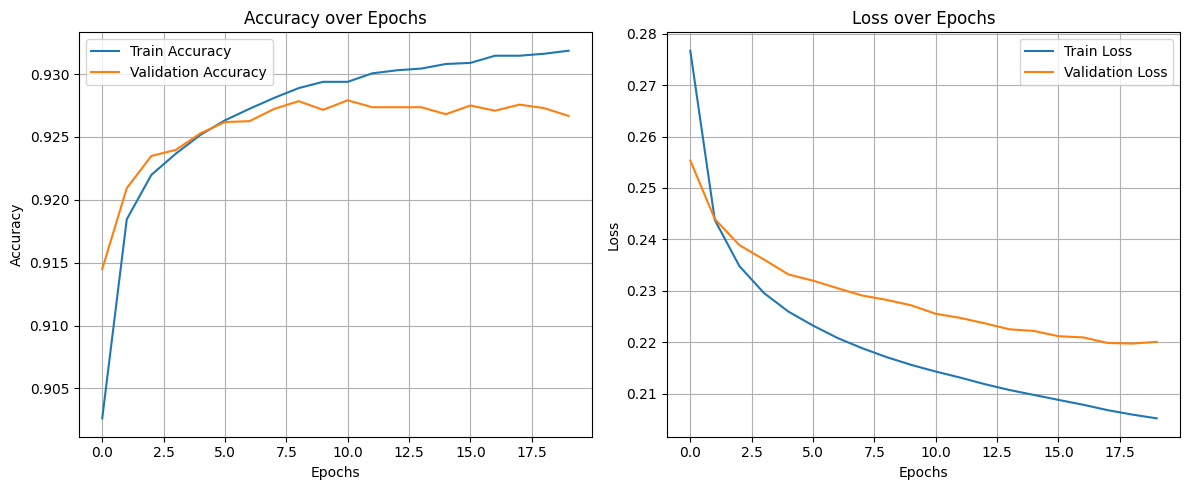

In [61]:
visualized_history(default_model_history)

In [40]:
# !pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.4 MB/s eta 0:00:00


In [41]:
import keras_tuner as kt

In [45]:
# Функція для побудови моделі з гіперпараметрами
def build_model(hp):
    model = Sequential()
    model.add(Dense(hp.Int('units', min_value=32, max_value=256, step=32),
                                 activation=hp.Choice('activation', ['relu', 'tanh']),
                                 input_shape=(X_train_scaled.shape[1],)))
    model.add(Dense(1, activation='sigmoid'))

    # Оптимізатор Adam з різними learning_rate
    optimizer = Adam(learning_rate=hp.Choice('learning_rate', [1e-3, 1e-4, 1e-5]))

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [46]:
# Вибір алгоритму пошуку
tuner = kt.BayesianOptimization(
    build_model,
    objective='val_accuracy',
    max_trials=10,  # Скільки моделей протестувати
    directory='my_tuner',
    project_name='hyperparam_search'
)

# Запуск пошуку
tuner.search(X_train_scaled, y_train, epochs=10, validation_data=(X_test_scaled, y_test))

# Найкраща комбінація гіперпараметрів
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

Trial 10 Complete [00h 01m 05s]
val_accuracy: 0.9261155128479004

Best val_accuracy So Far: 0.9261155128479004
Total elapsed time: 00h 11m 11s
Найкраща кількість нейронів: 256
Найкраща активація: relu


KeyError: 'optimizer does not exist.'

In [47]:
print(f"Найкраща кількість нейронів: {best_hps.get('units')}")
print(f"Найкраща активація: {best_hps.get('activation')}")
print(f"Найкращий learning_rate: {best_hps.get('learning_rate')}")

Найкраща кількість нейронів: 256
Найкраща активація: relu
Найкращий learning_rate: 0.001


In [48]:
tuner.results_summary()

Results summary
Results in my_tuner/hyperparam_search
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 09 summary
Hyperparameters:
units: 256
activation: relu
learning_rate: 0.001
Score: 0.9261155128479004

Trial 04 summary
Hyperparameters:
units: 128
activation: relu
learning_rate: 0.001
Score: 0.9247319102287292

Trial 08 summary
Hyperparameters:
units: 160
activation: relu
learning_rate: 0.001
Score: 0.9245935678482056

Trial 01 summary
Hyperparameters:
units: 64
activation: relu
learning_rate: 0.001
Score: 0.9216188192367554

Trial 06 summary
Hyperparameters:
units: 192
activation: tanh
learning_rate: 0.001
Score: 0.912763774394989

Trial 00 summary
Hyperparameters:
units: 256
activation: relu
learning_rate: 0.0001
Score: 0.9052231311798096

Trial 05 summary
Hyperparameters:
units: 32
activation: relu
learning_rate: 0.0001
Score: 0.8917329907417297

Trial 07 summary
Hyperparameters:
units: 256
activation: relu
learning_rate: 1e-05
Score: 0.8765133023262

Судячи з результатів пошуку оптимальних гіперпараметрів, виявилось, що найкращий learning_rate має бути 0.001. Найкращі кількість нейронів - 256. А найкраща функція активації - це relu.
Ми не зупинятимемось і додамо ще один прихований слой і проведемо ще один пошук гіперпараметрів, а точніше кількість нейронів для нового слою.

In [49]:
# Функція для побудови моделі з гіперпараметрами
def build_new_model(hp):
    model = Sequential()
    model.add(Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
    # Другий прихований шар з варіацією кількості нейронів
    model.add(Dense(hp.Choice('new_units', [32, 64, 128, 256]), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # Оптимізатор Adam з різними learning_rate
    optimizer = Adam(learning_rate=0.001)

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [50]:
# Вибір алгоритму пошуку
new_tuner = kt.BayesianOptimization(
    build_new_model,
    objective='val_accuracy',
    max_trials=4,  # Скільки моделей протестувати
    directory='my_tuner',
    project_name='new_hyperparam_search'
)

# Запуск пошуку
new_tuner.search(X_train_scaled, y_train, epochs=10, validation_data=(X_test_scaled, y_test))

# Найкраща комбінація гіперпараметрів
new_best_hps = new_tuner.get_best_hyperparameters(num_trials=1)[0]

Trial 4 Complete [00h 01m 21s]
val_accuracy: 0.9267381429672241

Best val_accuracy So Far: 0.9267381429672241
Total elapsed time: 00h 05m 24s


In [52]:
print(f"Найкраща кількість нейронів у другому шарі: {new_best_hps.get('new_units')}")

Найкраща кількість нейронів у другому шарі: 32


In [53]:
new_tuner.results_summary()

Results summary
Results in my_tuner/new_hyperparam_search
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 3 summary
Hyperparameters:
new_units: 32
Score: 0.9267381429672241

Trial 0 summary
Hyperparameters:
new_units: 128
Score: 0.9265998005867004

Trial 1 summary
Hyperparameters:
new_units: 256
Score: 0.9265305995941162

Trial 2 summary
Hyperparameters:
new_units: 32
Score: 0.9265305995941162


Після дослідження другого пошуку гіперпараметрів, виявилось, що з новим слоєм якість трішки покращилась, а найкращий параметр кількості нейронів для другого слою - це 32. Тепер спробуємо додати Dropout, щоб покращити результат точності на валідаційних даних ще більше, якщо це можливо.

In [57]:
best_model_with_dropout = Sequential()
best_model_with_dropout.add(Dense(256, activation="relu", input_shape=(X_train_scaled.shape[1],)))
best_model_with_dropout.add(Dropout(0.2))
best_model_with_dropout.add(Dense(32, activation="relu"))
best_model_with_dropout.add(Dropout(0.2))
best_model_with_dropout.add(Dense(1, activation="sigmoid"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [58]:
best_model_with_dropout.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [59]:
best_history = best_model_with_dropout.fit(X_train_scaled, y_train, epochs=20, validation_data=(X_test_scaled, y_test))

Epoch 1/20
1807/1807 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8783 - loss: 0.3253 - val_accuracy: 0.9119 - val_loss: 0.2548
Epoch 2/20
1807/1807 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9120 - loss: 0.2619 - val_accuracy: 0.9184 - val_loss: 0.2437
Epoch 3/20
1807/1807 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9172 - loss: 0.2495 - val_accuracy: 0.9204 - val_loss: 0.2359
Epoch 4/20
1807/1807 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9212 - loss: 0.2394 - val_accuracy: 0.9228 - val_loss: 0.2313
Epoch 5/20
1807/1807 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9231 - loss: 0.2360 - val_accuracy: 0.9241 - val_loss: 0.2274
Epoch 6/20
1807/1807 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9242 - loss: 0.2320 - val_accuracy: 0.9249 - val_loss: 0.2258
Epoch 7/20
1807/1807 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9262 - loss: 0.2286 - val_accuracy: 0.9254 - val_loss: 0.2224
Epoch 8/20
1807/1807 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9268 - loss: 0.2260

Порівняємо якість найкращої моделі та моделі з неоптимізованими гіперпараметрами. Почнемо з візуалізації якості та втрат у процесі навчання.

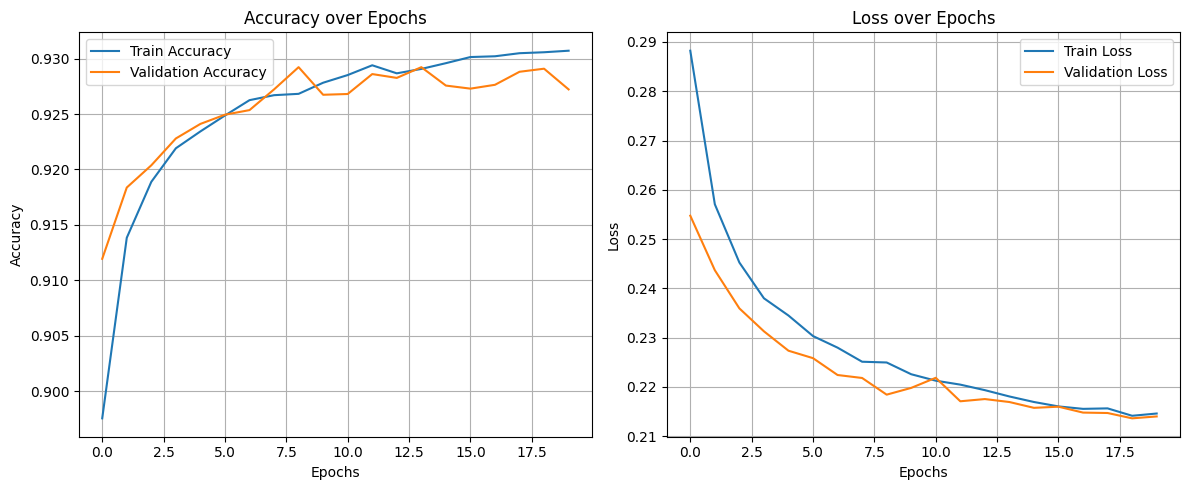

In [60]:
# Графік для нової моделі
visualized_history(best_history)

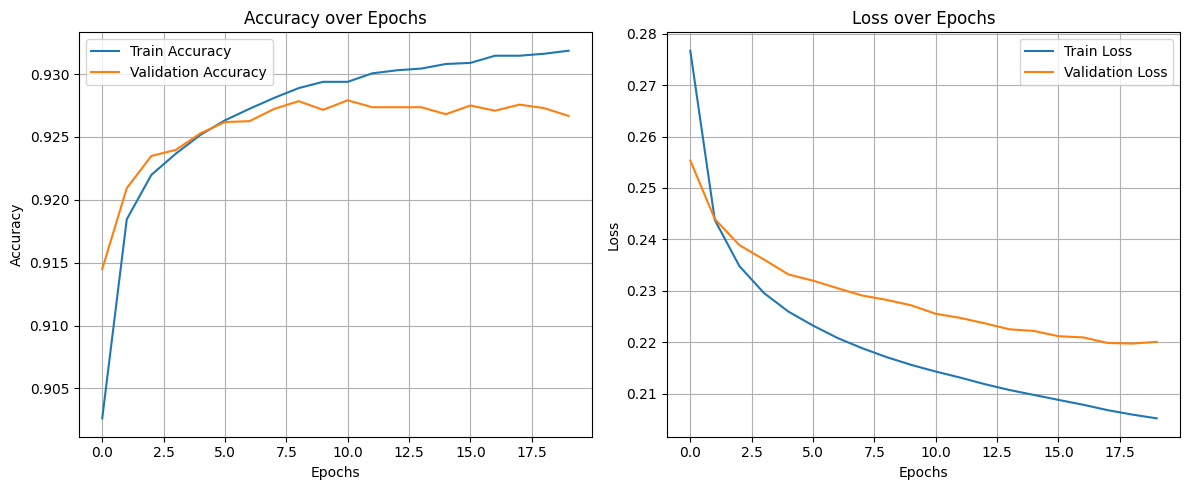

In [62]:
# Графік для старої моделі
visualized_history(default_model_history)

In [64]:
# Оцінка найкращої моделі на тестових даних
test_loss, test_accuracy = best_model_with_dropout.evaluate(X_test_scaled, y_test)

print(f"Тестова втрата (loss): {test_loss}")
print(f"Тестова точність (accuracy): {test_accuracy}")

452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9257 - loss: 0.2155
Тестова втрата (loss): 0.21401794254779816
Тестова точність (accuracy): 0.9272224307060242


In [65]:
# Оцінка старої моделі на тестових даних
test_loss, test_accuracy = default_model.evaluate(X_test_scaled, y_test)

print(f"Тестова втрата (loss): {test_loss}")
print(f"Тестова точність (accuracy): {test_accuracy}")

452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9262 - loss: 0.2207
Тестова втрата (loss): 0.22005188465118408
Тестова точність (accuracy): 0.9266690015792847


In [66]:
# Прогнозування на тестових даних найкращої моделі
y_pred = (best_model_with_dropout.predict(X_test_scaled) > 0.5).astype("int32")  # Оскільки це бінарна класифікація

# Виведення classification report
report = classification_report(y_test, y_pred)
print(report)

452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      6532
           1       0.94      0.93      0.93      7923

    accuracy                           0.93     14455
   macro avg       0.93      0.93      0.93     14455
weighted avg       0.93      0.93      0.93     14455



In [67]:
# Прогнозування на тестових даних старої моделі
y_pred = (default_model.predict(X_test_scaled) > 0.5).astype("int32")  # Оскільки це бінарна класифікація

# Виведення classification report
report = classification_report(y_test, y_pred)
print(report)

452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      6532
           1       0.95      0.92      0.93      7923

    accuracy                           0.93     14455
   macro avg       0.93      0.93      0.93     14455
weighted avg       0.93      0.93      0.93     14455



Тепер стало дуже видно різницю між неоптимізованою моделлю та найкращою. По-перше, ми трохи зменшили похибку та збільшили точність найкращої моделі, у порівнянні зі старою. По-друге, Classification report виявив, що стара модель частіше вгадує клас 1, ніж клас 0. Це можна побачити у колонці precision, яка показує точність вгадування класу 0 на 90%, а класу 1 - на 95%. Модель стає менш точна, якщо їй потрібно передбачити вірогідність першого класу. У нової моделі, яку ми оптимізували, ми запобігли нерівномірну точність вгадування двох різних класів і трохи згладили їхню різницю точності (клас 0 = 92%, клас 1 = 94%).

У висновку, ми змогли добитися точності передбачень 92.72% за допомогою оптимізації гіперпараметрів та згладили нерівномірне вгадування двох різних класів

Збережемо нашу навчену модель

In [68]:
best_model_with_dropout.save('dnn_model.h5')

In [69]:
files.download('dnn_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>